# Generating Rest Frame SEDs from a Parametric Galaxy including dust emission
<br>
Example for generating the rest-frame spectrum for a parametric galaxy including dust emission


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from synthesizer.filters import FilterCollection
from synthesizer.grid import Grid
from synthesizer.parametric.sfzh import SFH, ZH, generate_sfzh
from synthesizer.parametric.galaxy import Galaxy
from synthesizer.plt import single, single_histxy, mlabel
from synthesizer.dust.emission import Greybody, Casey12
from unyt import yr, Myr, K, um
from astropy.cosmology import Planck18 as cosmo

In [3]:
# Define the grid
grid_name = "test_grid"
grid_dir = "../../../tests/test_grid/"
grid = Grid(grid_name, grid_dir=grid_dir)

In [4]:
# define the parameters of the star formation and metal enrichment histories
sfh_p = {'duration': 10 * Myr}
Z_p = {'log10Z': -2.0}  # can also use linear metallicity e.g. {'Z': 0.01}
stellar_mass = 1E8

# define the functional form of the star formation and metal enrichment histories
sfh = SFH.Constant(sfh_p)  # constant star formation
Zh = ZH.deltaConstant(Z_p)  # constant metallicity

# get the 2D star formation and metal enrichment history for the given SPS grid. This is (age, Z).
sfzh = generate_sfzh(grid.log10age, grid.metallicity, sfh, Zh, stellar_mass=stellar_mass)

# create a galaxy object
galaxy = Galaxy(sfzh)

Simple dust and gas screen


/Users/sw376/Dropbox/Research/projects/synthesizer/venv/lib/python3.10/site-packages/unyt/array.py:1802: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


(<Figure size 350x500 with 1 Axes>,
 <Axes: xlabel='$\\rm log_{10}(\\lambda/\\AA)$', ylabel='$\\rm log_{10}(L_{\\nu}/erg\\ s^{-1}\\ Hz^{-1} M_{\\odot}^{-1})$'>)

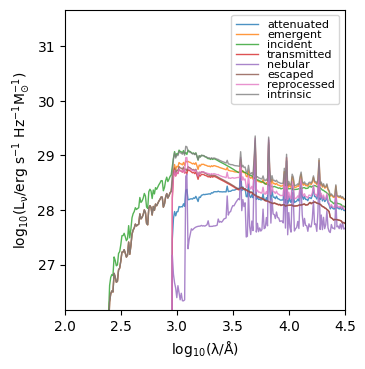

In [5]:
# # --- simple dust and gas screen
galaxy.get_spectra_pacman(grid, tau_v = 0.3, fesc = 0.5)
print("Simple dust and gas screen")
galaxy.plot_spectra()


In [6]:
print(galaxy.spectra['intrinsic'].get_bolometric_luminosity())
print(galaxy.spectra['emergent'].get_bolometric_luminosity())

3.576870122032831e+44 erg/s
2.705865003410327e+44 erg/s


In [7]:
emissionmodel = Greybody(50*K, 1.5)

/Users/sw376/Dropbox/Research/projects/synthesizer/venv/lib/python3.10/site-packages/unyt/array.py:1802: RuntimeWarning: overflow encountered in exp
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


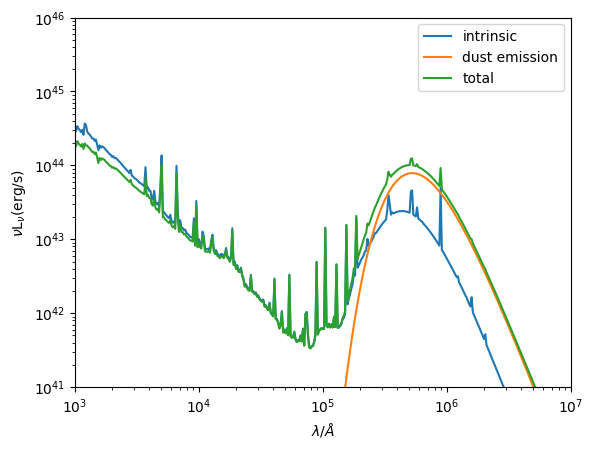

In [8]:
galaxy.get_spectra_dust(emissionmodel)


plt.loglog(galaxy.spectra['intrinsic'].lam, galaxy.spectra['intrinsic'].nu*galaxy.spectra['intrinsic'].lnu, label = 'intrinsic')
plt.loglog(galaxy.spectra['dust'].lam, galaxy.spectra['dust'].nu*galaxy.spectra['dust'].lnu, label = 'dust emission')
plt.loglog(galaxy.spectra['total'].lam, galaxy.spectra['total'].nu*galaxy.spectra['total'].lnu, label = 'total')
plt.xlabel(r'$\lambda$/$\AA$')
plt.ylabel(r'$\nu$L$_{\nu}$(erg/s)')
plt.ylim([1E41, 1E46])
plt.xlim([1E3, 1E7])
plt.legend()

In [9]:
emissionmodel = Casey12(T=50*K, emissivity=1.5, alpha=2., lam_0=100*um)

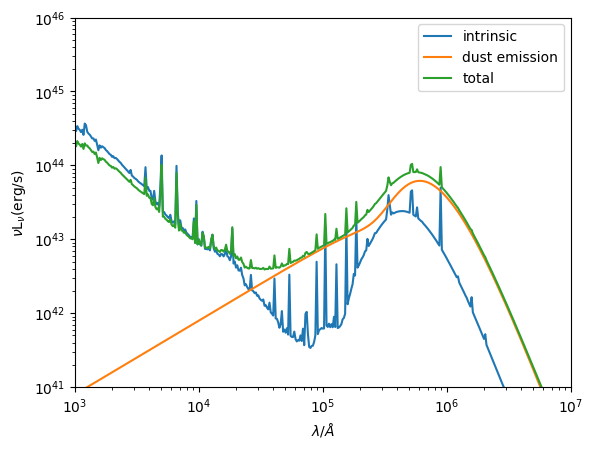

In [10]:
galaxy.get_spectra_dust(emissionmodel)

plt.loglog(galaxy.spectra['intrinsic'].lam, galaxy.spectra['intrinsic'].nu*galaxy.spectra['intrinsic'].lnu, label = 'intrinsic')
plt.loglog(galaxy.spectra['dust'].lam, galaxy.spectra['dust'].nu*galaxy.spectra['dust'].lnu, label = 'dust emission')
plt.loglog(galaxy.spectra['total'].lam, galaxy.spectra['total'].nu*galaxy.spectra['total'].lnu, label = 'total')
plt.xlabel(r'$\lambda$/$\AA$')
plt.ylabel(r'$\nu$L$_{\nu}$(erg/s)')
plt.ylim([1E41, 1E46])
plt.xlim([1E3, 1E7])
plt.legend()